<a href="https://colab.research.google.com/github/Anirudh1905/Data_Analytics/blob/master/LOG_REG(ROC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Simmons.xls')
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [92]:
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [93]:
data['Coupon'].unique()

array([0, 1])

In [94]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
x=data[['Card','Spending']]
y=data['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [97]:
 len(x_train),len(y_train),len(x_test),len(y_test)

(75, 75, 25, 25)

In [98]:
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_predict_test=Lreg.predict(x_test)
y_predict_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [100]:
y_predict_train=Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0])

In [101]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [102]:
y_prob_test=Lreg.predict_proba(x_test)[:,1]
y_prob_test.reshape(1,-1)

array([[0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
        0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
        0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
        0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
        0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435]])

In [103]:
import statsmodels.api as sm
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.1012
Time:                        08:12:43   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.445      2.471      0.013       0.227       1.970
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
==============================================================================
"""

In [104]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score

0.76

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[15,  1],
       [ 5,  4]])

In [106]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print('TRUE NEGATIVE: ',tn)
print('FALSE POSITIVE: ',fp)
print('FALSE NEGATIVE: ',fn)
print('TRUE POSITIVE: ',tp)

TRUE NEGATIVE:  15
FALSE POSITIVE:  1
FALSE NEGATIVE:  5
TRUE POSITIVE:  4


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [108]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.76


In [109]:
Specifity=tn/(tn+fp)
print("Specifity {:0.2f}".format(Specifity))

Specifity 0.94


In [110]:
Sensitivity=tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.44


**FOR TRAIN**

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_ROC_AUC1=roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

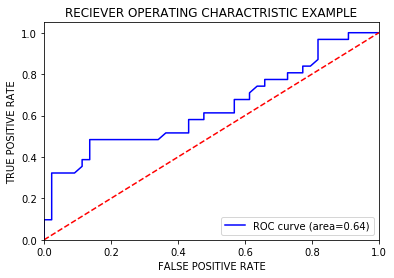

In [112]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC curve (area=%0.2f)'% roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('RECIEVER OPERATING CHARACTRISTIC EXAMPLE')
plt.legend(loc="lower right")
plt.show()

In [0]:
log_ROC_AUC1=roc_auc_score(y_test,y_predict_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,y_prob_test)
roc_auc1=auc(fpr1,tpr1)

**FOR TEST**

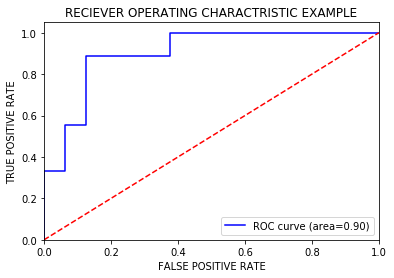

In [116]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC curve (area=%0.2f)'% roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('RECIEVER OPERATING CHARACTRISTIC EXAMPLE')
plt.legend(loc="lower right")
plt.show()

**FOR 0.35**

In [120]:
from sklearn.preprocessing import binarize
y_predict_test_class1=binarize(y_prob_test.reshape(1,-1),0.35)[0]
y_predict_test_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [121]:
y_predict_test_class1=y_predict_test_class1.astype(int)
y_predict_test_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [163]:
confusion_matrix_1=confusion_matrix(y_test,y_predict_test_class1)
confusion_matrix_1

array([[8, 8],
       [0, 9]])

In [164]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict_test_class1).ravel()
print('TRUE NEGATIVE: ',tn)
print('FALSE POSITIVE: ',fp)
print('FALSE NEGATIVE: ',fn)
print('TRUE POSITIVE: ',tp)

TRUE NEGATIVE:  8
FALSE POSITIVE:  8
FALSE NEGATIVE:  0
TRUE POSITIVE:  9


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



In [128]:
y_predict_test_class2=binarize(y_prob_test.reshape(1,-1),0.50)[0]
y_predict_test_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

**FOR 0.50**

In [129]:
y_predict_test_class2=y_predict_test_class2.astype(int)
y_predict_test_class2

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [165]:
confusion_matrix_2=confusion_matrix(y_test,y_predict_test_class2)
confusion_matrix_2

array([[15,  1],
       [ 5,  4]])

In [160]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict_test_class2).ravel()
print('TRUE NEGATIVE: ',tn)
print('FALSE POSITIVE: ',fp)
print('FALSE NEGATIVE: ',fn)
print('TRUE POSITIVE: ',tp)

TRUE NEGATIVE:  15
FALSE POSITIVE:  1
FALSE NEGATIVE:  5
TRUE POSITIVE:  4


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



**FOR 0.70**

In [142]:
y_predict_test_class3=binarize(y_prob_test.reshape(1,-1),0.70)[0]
y_predict_test_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [143]:
y_predict_test_class3=y_predict_test_class3.astype(int)
y_predict_test_class3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [166]:
confusion_matrix_3=confusion_matrix(y_test,y_predict_test_class3)
confusion_matrix_3

array([[16,  0],
       [ 9,  0]])

In [161]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict_test_class3).ravel()
print('TRUE NEGATIVE: ',tn)
print('FALSE POSITIVE: ',fp)
print('FALSE NEGATIVE: ',fn)
print('TRUE POSITIVE: ',tp)

TRUE NEGATIVE:  16
FALSE POSITIVE:  0
FALSE NEGATIVE:  9
TRUE POSITIVE:  0


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob_test)
roc_auc=auc(fpr,tpr)

In [148]:
print('Area under curve : %f'%roc_auc)

Area under curve : 0.902778


FIND THRESHOLD

In [151]:
i=np.arange(len(tpr))
roc=pd.DataFrame({'fpr' : pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),'1-fpr' :pd.Series(1-fpr,index=i),'tf' : pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


[]

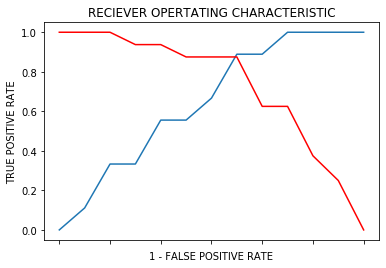

In [153]:
fig,ax=plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1 - FALSE POSITIVE RATE')
plt.ylabel("TRUE POSITIVE RATE")
plt.title('RECIEVER OPERTATING CHARACTERISTIC')
ax.set_xticklabels([])

**FOR 0.457(THRESHOLD)**

In [154]:
y_predict_test_class4=binarize(y_prob_test.reshape(1,-1),0.457)[0]
y_predict_test_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [156]:
y_predict_test_class4=y_predict_test_class4.astype(int)
y_predict_test_class4

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0])

In [167]:
confusion_matrix_4=confusion_matrix(y_test,y_predict_test_class4)
confusion_matrix_4

array([[14,  2],
       [ 1,  8]])

In [162]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict_test_class4).ravel()
print('TRUE NEGATIVE: ',tn)
print('FALSE POSITIVE: ',fp)
print('FALSE NEGATIVE: ',fn)
print('TRUE POSITIVE: ',tp)

TRUE NEGATIVE:  14
FALSE POSITIVE:  2
FALSE NEGATIVE:  1
TRUE POSITIVE:  8


In [158]:
print(classification_report(y_test,y_predict_test_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

